<a href="https://colab.research.google.com/github/Python-Neiva/Neural-Networks-CQ-UNIVERSITY/blob/main/Neural_Networks_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 - An image transformation problem

Image recognition and classification technology have many applications in real-world software
systems. A large image dataset is usually required for training a neural network. In the case of lacking
sufficient images, data augmentation will be used to increase the available image data for training
purposes. This is particularly true for training a convolutional neural network in the image
classification application because this type of application needs a huge number of image data as input
during the training process. In this exercise, you are required to write a simple Python program to
read an image file, then make the geometrical transformations and image filter handling, including the manipulations.

- (1) generate four new images by randomly shifting the original image along x-axis and y-axis with the range between -100 to 100 pixels both in x-axis and y-axis.
- (2)generate four
new images by randomly rotating the original image with angles between 0 and 180 degrees.
- (3)
flip the image upside down,
- (4)generate four new images by adding different level noises to the
original image, and
- (5) blurring the original image using Gaussian filter.

The original image file can
be downloaded from the unit moodle website. You can use other image files but you must do the
required manipulations. You also need to use Python advanced programming libraries including
numpy, scipy and matplotlib. Your Python code should include a menu that allows the users to have
the options to display a particular image and quit the application.



---



## This are the libraries that will be required to run the code

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.ndimage import gaussian_filter, rotate
from skimage import io, util



## Declaring functions that will be used as options

The options that will be displayed will call functions, so that the code can be organised in a way that is more readable and maintainable, following software development good practices.

In [145]:
# Function to shift the image
def shift_image(image, shift_x, shift_y):
    return np.roll(np.roll(image, shift_x, axis=1), shift_y, axis=0)

# Function to rotate the image
def rotate_image(image, angle):
    return rotate(image, angle, reshape=False)

# Function to add noise to the image
def add_noise(image, noise_level):
    return util.random_noise(image, var=noise_level**2)

# Function to flip the image upside down
def flip_image(image):
    return np.flipud(image)

# Function to blur the image using Gaussian filter
def blur_image(image, sigma):
    return gaussian_filter(image, sigma=sigma)

# Load the original image
image = io.imread('problem_I/car.png')

# Generate four new images by randomly shifting the original image
shifted_images = [shift_image(image, random.randint(-100, 100), random.randint(-100, 100)) for _ in range(4)]

# Generate four new images by randomly rotating the original image
rotated_images = [rotate_image(image, random.uniform(0, 180)) for _ in range(4)]

# Flip the image upside down
flipped_image = flip_image(image)

# Generate four new images by adding different level noises to the original image
noisy_images = [add_noise(image, random.uniform(0.01, 0.1)) for _ in range(4)]

# Blur the original image using Gaussian filter
blurred_image = blur_image(image, sigma=2)

## Display menu options for user to select and display images


In [146]:
def display_menu():
    print("Menu:")
    print("1. Display Original Image")
    print("2. Display Shifted Images")
    print("3. Display Rotated Images")
    print("4. Display Flipped Image")
    print("5. Display Noisy Images")
    print("6. Display Blurred Image")
    print("7. Quit")

In [147]:
while True:
    display_menu()
    choice = input("Enter your choice: ")

    if choice == '1':
        plt.imshow(image)
        plt.title('Original Image')
        plt.show()
    elif choice == '2':
        for i, img in enumerate(shifted_images):
            plt.imshow(img)
            plt.title(f'Shifted Image {i+1}')
            plt.show()
    elif choice == '3':
        for i, img in enumerate(rotated_images):
            plt.imshow(img)
            plt.title(f'Rotated Image {i+1}')
            plt.show()
    elif choice == '4':
        plt.imshow(flipped_image)
        plt.title('Flipped Image')
        plt.show()
    elif choice == '5':
        for i, img in enumerate(noisy_images):
            plt.imshow(img)
            plt.title(f'Noisy Image {i+1}')
            plt.show()
    elif choice == '6':
        plt.imshow(blurred_image)
        plt.title('Blurred Image')
        plt.show()
    elif choice == '7':
        break
    else:
        print("Invalid choice. Please try again.")

Menu:
1. Display Original Image
2. Display Shifted Images
3. Display Rotated Images
4. Display Flipped Image
5. Display Noisy Images
6. Display Blurred Image
7. Quit


KeyboardInterrupt: Interrupted by user

## Justification for Rotations and Noise Addition
Rotations:
- Rotating images by random angles between 0 and 180 degrees helps the neural network learn to recognize objects from different orientations, improving its robustness and generalization.
- Noise Addition:
 - Adding different levels of noise to the images simulates real-world conditions where images might be noisy. This helps the neural network become more resilient to noise and improves its performance on noisy data.

#  Problem 2 - Data visualization

In [148]:
# importing pandas module
import pandas as pd

# making data frame
income_df = pd.read_csv("problem_II/incomeV4.csv")

income_df.head(10)

,id,income,state,sex
0,101,50000,NSW,Female
1,102,60000,QLD,Female
2,103,65010,QLD,Female
3,104,79000,QLD,Female
4,105,33000,WA,Female
5,106,170000,NSW,Female
6,107,250000,VIC,Female
7,108,155000,VIC,Female
8,109,76000,VIC,Female
9,110,99000,WA,Female


Once the graphics were genereted, it was evident that the female and femal values in the sex column were a mistake, and that although femal is more common, female is consistent with the other value (Male), which name is complete. Hence, the femal value will be turned into Female as part of the data preparation. This was done using Microsoft EXCEL.

Using a new library called atlas, it is possible to aprpeciate the graphs in a clearer way than the ones generated by matploitlib.

In [149]:
import altair as alt

# Pie chart showing income distribution
pie_chart = alt.Chart(income_df).mark_arc().encode(
    theta="income:Q",
    color="state:N"
).properties(title="Income Distribution by State")


# Bar chart showing income distribution
bar_chart = alt.Chart(income_df).mark_bar().encode(
    x="state:N",
    y="income:Q"
).properties(title="Income Distribution by State")

# Histogram showing income distribution by male/female
histogram = alt.Chart(income_df).mark_bar().encode(
    alt.X("income:Q", bin=alt.Bin(maxbins=20)),
    alt.Y('count()', stack=None),
    color='sex:N'
).properties(title="Income Distribution by Gender")

# Scatter plot showing income by male/female and by state
scatter_plot = alt.Chart(income_df).mark_circle().encode(
    x='state:N',
    y='income:Q',
    color='sex:N',
    tooltip=['sex', 'state', 'income']
).properties(title="Income by Gender and State")

pie_chart & bar_chart & histogram & scatter_plot


alt.VConcatChart(...)

using **data_table** from *google.colab* to print the data frame in an interactive way.

In [150]:
from google.colab import data_table

data_table.enable_dataframe_formatter()
data_table.DataTable(income_df, include_index=False, num_rows_per_page=10)

,id,income,state,sex
0,101,50000,NSW,Female
1,102,60000,QLD,Female
2,103,65010,QLD,Female
3,104,79000,QLD,Female
4,105,33000,WA,Female
...,...,...,...,...
110,190,56000,SA,Male
111,191,87000,NT,Male
112,212,87000,NSW,Male
113,213,98000,VIC,Male


In [151]:
# Calculate the median income
median_income = income_df['income'].median()

# Calculate the minimum income
min_income = income_df['income'].min()

# Calculate the maximum income
max_income = income_df['income'].max()

# Calculate the percentage of residents whose income is below the median income
percentage_below_median = (income_df['income'] < median_income).sum() / len(income_df) * 100

# Calculate the percentage of residents whose income is above the median income
percentage_above_median = (income_df['income'] > median_income).sum() / len(income_df) * 100

# Print the results
print(f"Median Income: {median_income}")
print(f"Minimum Income: {min_income}")
print(f"Maximum Income: {max_income}")
print(f"Percentage of Residents Below Median Income: {percentage_below_median:.2f}%")
print(f"Percentage of Residents Above Median Income: {percentage_above_median:.2f}%")

Median Income: 90880.0
Minimum Income: 5005
Maximum Income: 320000
Percentage of Residents Below Median Income: 49.57%
Percentage of Residents Above Median Income: 49.57%


## Charts Report
- A pie chart showing the income distributions of all residents.
- A bar chart showing the income distributions of all residents.
- A histogram showing the income distribution by male and female.
- A scatter plot showing the income by male/female and by state


In [152]:

import matplotlib.pyplot as plt

# customizing runtime configuration stored
# in matplotlib.rcParams
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True


### Pie chart
A pie chart showing the income distributions of all residents.

In [153]:
def income_pie_chart():
    fig, ax = plt.subplots()
    income_df['income'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, textprops={'size': 'x-small'})
    ax.set_title("Income Distributions of all Residents (Pie chart)")
    pdf.savefig(fig)

    plt.close(fig)


### Bar chart
A bar chart showing the income distributions of all residents.

In [154]:
def income_bar_chart():
    fig, ax = plt.subplots(figsize=(13, 6))
    income_df['income'].value_counts().plot.bar(ax=ax)
    ax.set_title("Income Distributions of all Residents (Bar chart)")
    pdf.savefig(fig)

    plt.close(fig)



### Histogram
A histogram showing the income distribution by male and female.

In [155]:
def income_histogram_chart():
    fig, ax = plt.subplots()
    income_df.hist(column='income',by='sex',ax=ax)
    ax.set_title('Income Distribution by Male and Female')
    pdf.savefig(fig)


    plt.close(fig)



### Scatter Plot
A scatter plot showing the income by male/female and by state.

In [156]:
def income_scatter_chart():
    fig, ax = plt.subplots(figsize=(4, 4))
    # Convert 'state' to numerical values for sizing
    state_sizes = income_df['state'].astype('category').cat.codes

    # Use the numerical state values for the size of the points
    income_df.plot.scatter(x='sex', y='income', s=state_sizes * 10 , c='red', ax=ax)  # Adjust multiplier for desired size

    ax.set_title('Income by Male/Female and by State')
    pdf.savefig(fig)

    plt.close(fig)

In [157]:
plt.show()

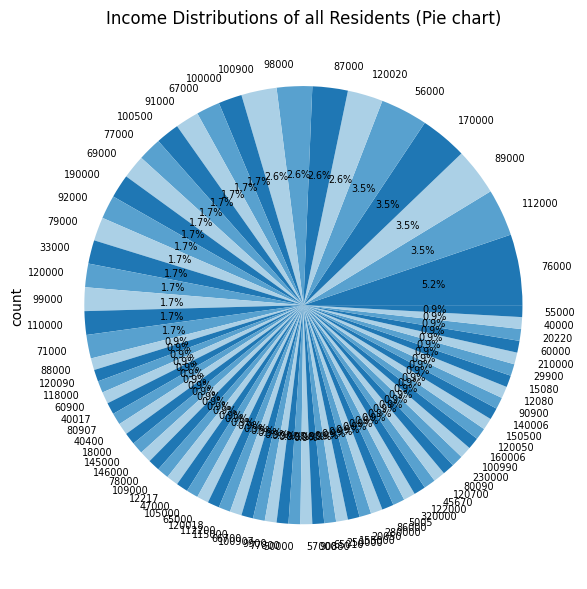

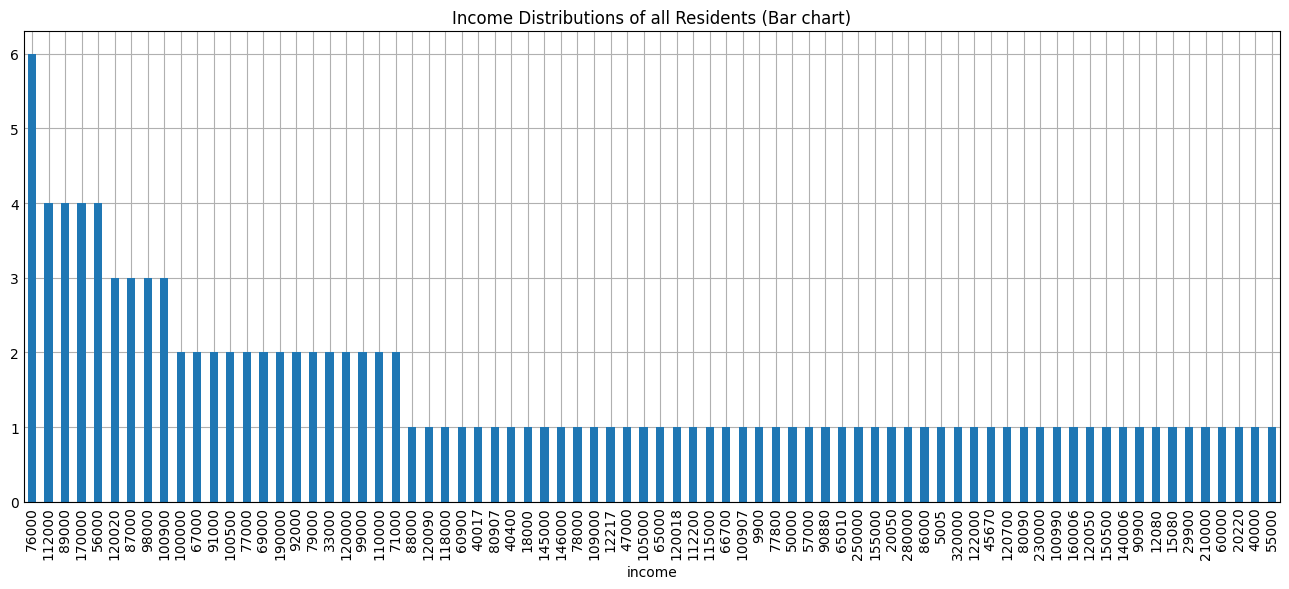

In [158]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to store the report
pdf_file = "income_report.pdf"  # Replace with your desired filename

with PdfPages(pdf_file) as pdf:

    # Create the technical report content
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size as needed
    ax.axis('off')
    ax.text(0.1, 0.9, "Income Analysis Report", fontsize=16, weight='bold')
    ax.text(0.1, 0.8, f"Median Income: {median_income}", fontsize=12)
    ax.text(0.1, 0.75, f"Minimum Income: {min_income}", fontsize=12)
    ax.text(0.1, 0.7, f"Maximum Income: {max_income}", fontsize=12)
    ax.text(0.1, 0.65, f"Percentage Below Median: {percentage_below_median:.2f}%", fontsize=12)
    ax.text(0.1, 0.6, f"Percentage Above Median: {percentage_above_median:.2f}%", fontsize=12)
    pdf.savefig(fig)
    plt.close(fig)

    income_pie_chart()
    income_bar_chart()
    income_histogram_chart()
    income_scatter_chart()

## Categorizing income levels
Your program should save the sorted data into a CSV file, with sorting based on income in ascending
order. Here, we assume the criteria for categorizing income levels are as follows:
- Low income: $0-$50,000
- Middle-low income: $50,001-$80,000
- Middle income: $80,001-$140,000
- High income: above $140,000

In [159]:


import pandas as pd

# Load the income data
income_df = pd.read_csv("problem_II/incomeV4.csv")

# Categorize income levels
def categorize_income(income):
    if 0 <= income <= 50000:
        return 'Low income'
    elif 50001 <= income <= 80000:
        return 'Middle-low income'
    elif 80001 <= income <= 140000:
        return 'Middle income'
    elif income > 140000:
        return 'High income'
    else:
        return 'Unknown'  # Handle potential negative incomes or other unexpected values

income_df['income_category'] = income_df['income'].apply(categorize_income)

# Sort the data by income in ascending order
income_df_sorted = income_df.sort_values(by='income')

# Save the sorted data to a CSV file
income_df_sorted.to_csv('reports/sorted_income_data.csv', index=False)

visualising the new data frame with interactives data tables.

In [160]:
data_table.DataTable(income_df_sorted, include_index=False, num_rows_per_page=10)

,id,income,state,sex,income_category
18,119,5005,VIC,Female,Low income
93,173,9900,QLD,Male,Low income
39,195,12080,NSW,Female,Low income
99,179,12217,QLD,Male,Low income
40,196,15080,NSW,Female,Low income
...,...,...,...,...,...
43,200,210000,NSW,Female,High income
28,152,230000,VIC,Female,High income
6,107,250000,VIC,Female,High income
12,113,280000,NSW,Female,High income


## Questions:
### Which state has the most residents with incomes higher than the median income of all residents?



In [165]:
# obtain the residents with with high income per state
high_income_per_state = income_df[income_df['income'] > median_income].groupby('state').size()

high_income_per_state.head()

,0
state,
NSW,17
QLD,18
SA,3
VIC,17
WA,2


- The statewith the largest amount of residents with incomes higher than the median income is QLD with 18. That in comparision with NSW and VIC with 17  each, and SA and WA with 3 and 2 respectively.


Describe the features of the data distribution based on your observations after the data visualization.


### Can the income distribution be described by a single Gaussian kernel? Regardless of your answer,
explain your reasoning.

No, the income distribution is unlikely to be accurately described by a single Gaussian kernel, the reason why is that:

First, income data is typically skewed:  Income distributions often exhibit positive skew.  There's a lower bound of zero income, but the upper bound is theoretically unlimited.  This leads to a "long tail" on the right side of the distribution, which a Gaussian distribution, being symmetric, cannot capture.  For instance, single Gaussian would underestimate the number of people with very high incomes and overestimate the number of people with incomes slightly above average.


Another reason is multimodality:  Income distributions can have multiple peaks, or modes.  For example, there might be a mode around the median income, another mode representing lower-income earners, and perhaps another mode representing upper-middle-class or high-income earners.  A Gaussian has only one peak, so it cannot represent such a multimodal structure.


 Finally, external factors are also to be taken into accoun: Income is impacted by numerous factors that are not easily reflected in a single bell curve.  Differences in educational attainment, occupation, location, and other socio-economic factors all influence earnings, creating a more complex distribution than a Gaussian can represent.

 In conclussion, the before reasons seem to demostrate that a single gausian is not an appropiate model to work with this dataset, due to external factors, multimodality, and it is designed to work with a single peak. Hence, another model should be taken into account for future model development for the income dataset used in this example.


### From the dataset and data visualization, define a business problem. Explain how addressing this
problem can assist a government agency such as the Australian Taxation Office (ATO)


Business Problem
Tax Evasion Detection and income inequality

Explanation:
The provided dataset and visualizations reveal income disparities across states and genders. A significant business problem is the potential for income inequality to aggravate tax evasion. For instance, individuals in higher income brackets may be more inclined to underreport their income to reduce tax burdens. Conversely, lower-income individuals can be unfairly impacted by inefficient tax systems.


How it assists the ATO:

1. Targeted Audits: By analyzing income distributions, the ATO can identify states and demographics with a higher-than-average proportion of residents
whose income exceeds the median. These areas might be prioritized for audits, as they may indicate potential hotspots for tax evasion amongst high-income earners.
2. Tax Policy Refinement: Understanding income disparities can inform the development of more progressive tax policies. By analyzing income distribution patterns,
the ATO can fine-tune tax brackets and deductions to ensure a fairer distribution of the tax burden.
3. Identifying anomalies: The analysis can help identify income reporting anomalies, such as vast numbers of individuals with identical or very similar incomes,
or sharp variations in reported incomes within a specific region or demographic. The ATO can investigate these patterns to determine possible tax evasion activities.


# Problem 3 - A Regression Problem to Be Resolved Using Neural Network Techniques

In [168]:
# importing pandas module
import pandas as pd

# making data frame
weight_eyelenses_df = pd.read_csv("problem_III/problem3.csv")

weight_eyelenses_df.head(10)


,Ages,Weights
0,15,21.66
1,15,22.75
2,15,22.30
3,18,31.25
4,28,44.79
5,29,40.55
6,37,50.25
7,37,46.88
8,44,52.03
9,50,63.47


In [179]:
# Ages vs Weights

from matplotlib import pyplot as plt

def plot_ages_vs_weights(weight_eyelenses_df, title):
    # add a header to the plot header
    print(title)
    weight_eyelenses_df.plot(kind='scatter', x='Ages', y='Weights', s=32, alpha=.8, title=title)
    plt.gca().spines[['top', 'right',]].set_visible(False)

original data for plot_ages_vs_weights


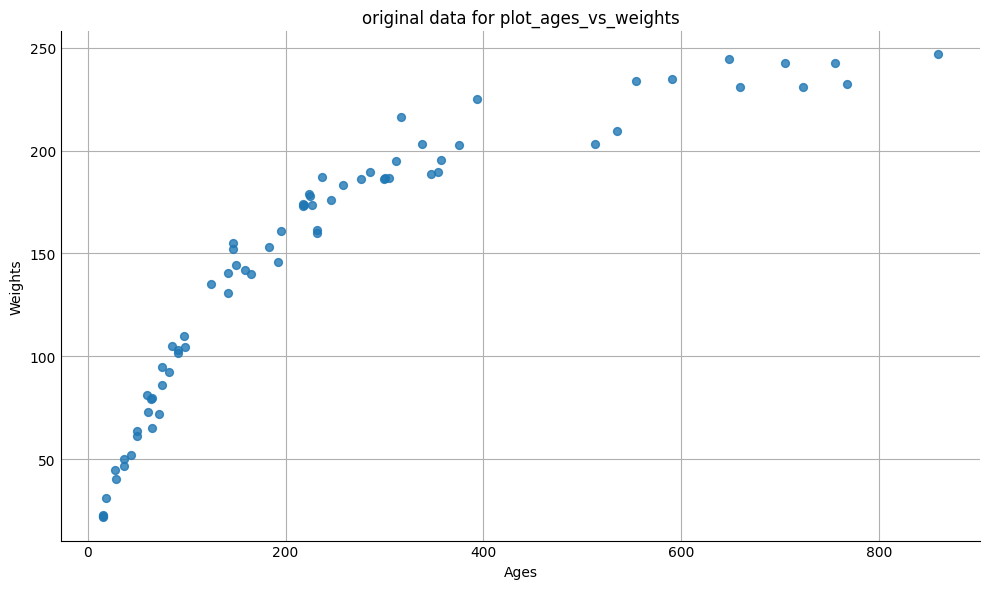

In [178]:
plot_ages_vs_weights(weight_eyelenses_df, "original data for plot_ages_vs_weights")

In [185]:
from sklearn.model_selection import train_test_split

def split_data(weight_eyelenses_df):
    # Separate features (X) and target variable (y)
    X = weight_eyelenses_df.drop('Weights', axis=1)
    y = weight_eyelenses_df['Weights']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

    # comment it to remove unnecesary saving of the generated datasets
    # Save the training data
    # X_train.to_csv('problem_III/train/train_features.csv', index=False)
    # y_train.to_csv('problem_III/train/train_target.csv', index=False)

    # Save the testing data
    # X_test.to_csv('problem_III/test/test_features.csv', index=False)
    # y_test.to_csv('problem_III/test/test_target.csv', index=False)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(weight_eyelenses_df)